Text(0.5,1,'Temperature Plot from 2005-2015(Ann Arbor, Michigan, United States)')

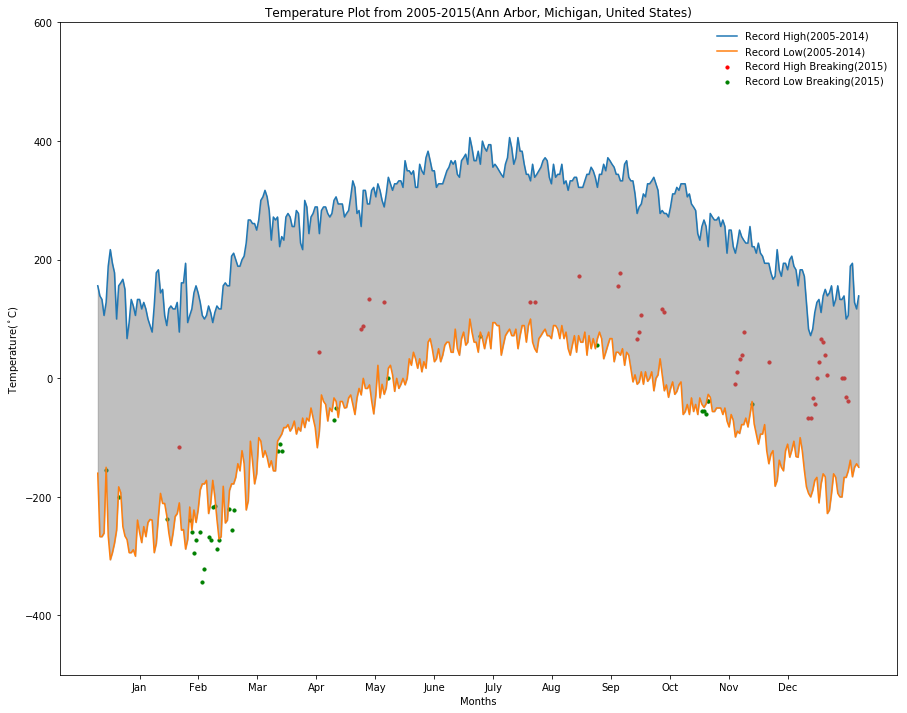

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as dates
import numpy as np
%matplotlib inline

df=pd.read_csv(r"D:\Courses\Applied Plotting, Charting & Data Representation in Python Coursera\Jupyter Practice\Assignment2.csv")
dic={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')
df = df[df['Month_Day']!='02-29']
#df['Year'] = df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Month']=df.apply(lambda row: dic[row.Month],axis=1)
df15=df[df['Date'].dt.year==2015]
df.drop(df[df['Date'].dt.strftime('%m-%d')=='02-29'].index,inplace=True)
df.drop(df[df['Date'].dt.year==2015].index,inplace=True)
grouped_dfmax=df[df['Element']=='TMAX'].groupby('Month_Day')['Data_Value'].max()
grouped_dfmin=df[df['Element']=='TMIN'].groupby('Month_Day')['Data_Value'].min()
date_index=list(dic.values())
grouped_dfmax_15=df15[df15['Element']=='TMAX'].groupby('Month_Day')['Data_Value'].max()
grouped_dfmin_15=df15[df15['Element']=='TMIN'].groupby('Month_Day')['Data_Value'].min()
#print(grouped_dfmax_15.values)
broken_max = np.where(grouped_dfmax_15.values > grouped_dfmax.values)[0]
broken_min = np.where(grouped_dfmin_15.values < grouped_dfmin.values)[0]
#print(grouped_dfmin_15.iloc[broken_max].values)
plt.figure(figsize=(12,10))
plt.ylim(-500,600)
plt.plot(grouped_dfmax.values,label="Record High(2005-2014)")
plt.plot(grouped_dfmin.values,label="Record Low(2005-2014)")
plt.scatter(broken_max,grouped_dfmin_15.iloc[broken_max].values,s=10,color='red',label="Record High Breaking(2015)")
plt.scatter(broken_min,grouped_dfmin_15.iloc[broken_min].values,s=10,color='green',label="Record Low Breaking(2015)")
plt.xticks(np.linspace(20,330, num = 12),date_index)
plt.gca().fill_between(range(len(grouped_dfmin.values)),grouped_dfmin.values,grouped_dfmax.values,color='gray',alpha=0.5)
plt.legend(frameon=False)
plt.xlabel("Months")
plt.ylabel("Temperature($^\circ$C)")
plt.title(r"Temperature Plot from 2005-2015(Ann Arbor, Michigan, United States)")